In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from skimage.color import rgb2gray, rgb2grey
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg
from sklearn.feature_extraction import image


## Data Reading / Control

In [2]:
musk= pd.read_csv('Musk1.csv', header = None)

In [3]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Columns: 168 entries, 0 to 167
dtypes: int64(168)
memory usage: 624.8 KB


In [4]:
musk.head(2)

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30


In [5]:
header_part1 = ['Bag_Class', 'Bag_ID']

In [6]:
musk.columns=header_part1+['Feature_'+str(x+1) for x in range(musk.shape[1]-len(header_part1))]

## Task-1 - a - PCA Analysis

In [7]:
def pca_analysis (df) : 
    Feature_List  = df.columns.to_list()
    feature = [s for s in Feature_List if "Feature" in s]
   # Separating out the features
    x = df.loc[:, feature].values
    # Separating out the target
    y = df.loc[:,['Bag_Class']].values 
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, df[['Bag_Class']]], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [1,0]
    colors = ['r', 'g', ]
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Bag_Class'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

    

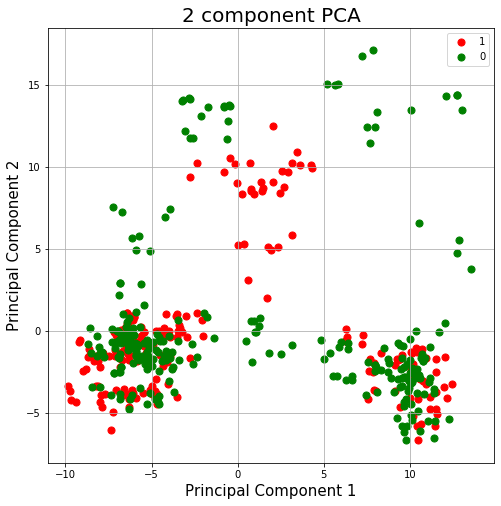

In [8]:
pca_analysis(musk)

## Task-1 - a - MDS Analysis

In [9]:
def plot_MDS(df):
    Feature_List  = df.columns.to_list()
    feature = [s for s in Feature_List if "Feature" in s]
   # Separating out the features
    x = df.loc[:, feature].values
    # Separating out the target
    y = df.loc[:,['Bag_Class']].values 
    mds=manifold.MDS(n_components=2, random_state=42)
    x=mds.fit_transform(x)
    principalDf = pd.DataFrame(data = x, columns = ['Component 1', 'Component 2'])
    finalDf = pd.concat([principalDf, df[['Bag_Class']]], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Component 1', fontsize = 15)
    ax.set_ylabel('Component 2', fontsize = 15)
    ax.set_title('2 component MDS', fontsize = 20)
    targets = [1,0]
    colors = ['r', 'g', ]
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Bag_Class'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                   , finalDf.loc[indicesToKeep, 'Component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

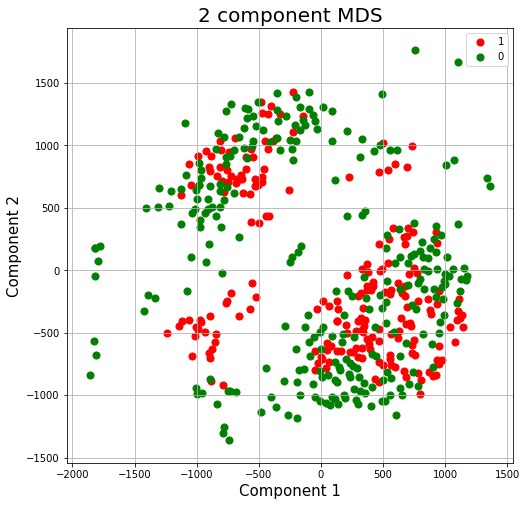

In [10]:
plot_MDS(musk)

## Task-1 - b - PCA Analysis


In [11]:
musk_groupby =  musk.groupby(['Bag_ID']).mean()

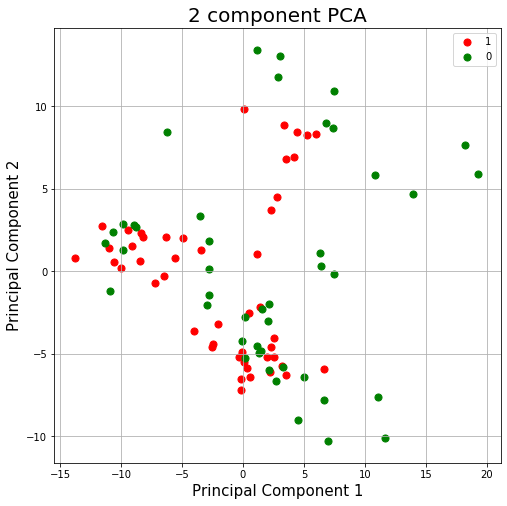

In [12]:
pca_analysis(musk_groupby)

## Task-1 - b - MDS Analysis

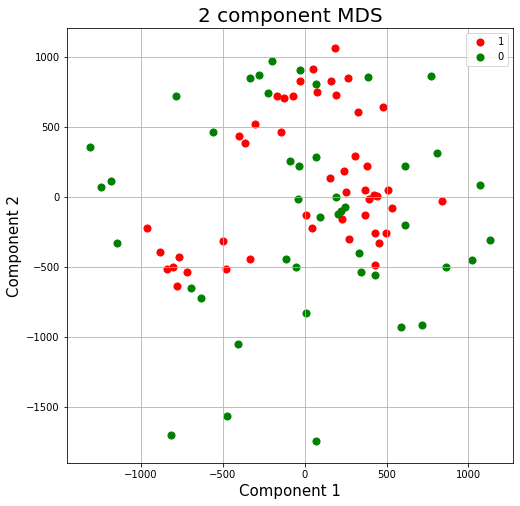

In [13]:
plot_MDS(musk_groupby)

### Task - 2 - 1

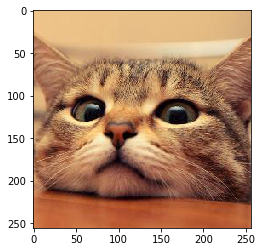

In [14]:
cat = plt.imread('cat.jpg')
plt.imshow(cat)
plt.show()

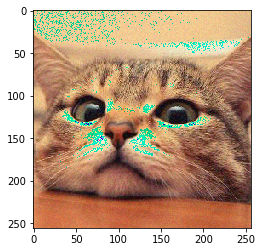

In [15]:
uniform = np.random.uniform(cat.min(),cat.max()/10,(256,256,3))
noisy_image = (cat + uniform)
noisy_image = noisy_image.astype('uint8')
plt.imshow(noisy_image)

## Task 2-2-b

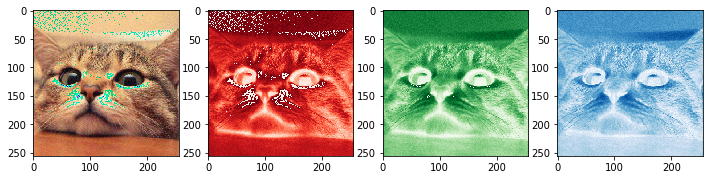

In [16]:
import skimage.io as io
import matplotlib.pyplot as plt

# Read
img = noisy_image

# Split
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

# Plot
fig, axs = plt.subplots(1,4,figsize=(12,12))

cat_original = axs[0].imshow(img)

cat_red = axs[1].imshow(red, cmap='Reds')

cat_green = axs[2].imshow(green, cmap='Greens')

cat_blue = axs[3].imshow(blue, cmap='Blues')



plt.show()

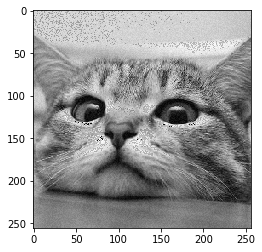

In [17]:
gray = rgb2gray(noisy_image)
plt.imshow(gray, cmap = plt.get_cmap('gray'))


## Task-3-a

In [21]:
patches = image.extract_patches_2d(gray,(25, 25))

In [30]:
patches_reshape = patches.reshape(patches.shape[0],-1)

In [31]:
patches_reshape.shape

(53824, 625)

In [46]:
principalDf.head()

,principal component 1,principal component 2,principal component 2
0,-5.858837,0.373119,0.111550
1,-5.907631,0.397050,0.086297
2,-5.904291,0.426192,0.079622
3,-5.901827,0.468006,0.033493
4,-5.911080,0.487686,-0.004989


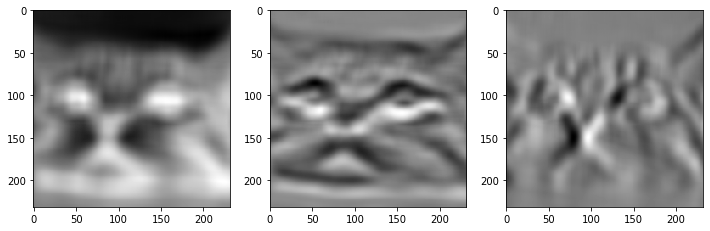

In [55]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(patches_reshape)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])


component_1 = principalDf['principal component 1'].values
component_2 = principalDf['principal component 2'].values
component_3 = principalDf['principal component 3'].values


fig, axs = plt.subplots(1,3,figsize=(12,12))

compo_1 = axs[0].imshow(component_1.reshape(232,232),cmap='gray')

compo_2 = axs[1].imshow(component_2.reshape(232,232),cmap='gray')

compo_3 = axs[2].imshow(component_3.reshape(232,232),cmap='gray')

In [58]:
print(pca.explained_variance_ratio_)

[0.57097112 0.09430031 0.05237012]


In [72]:
pca.components_

(3, 625)

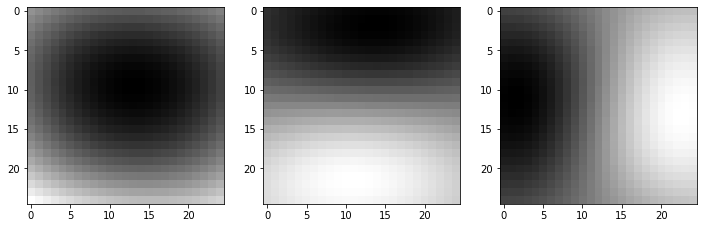

In [73]:
fig, axs = plt.subplots(1,3,figsize=(12,12))

compo_1 = axs[0].imshow(pca.components_[0].reshape(25,25),cmap='gray')

compo_2 = axs[1].imshow(pca.components_[1].reshape(25,25),cmap='gray')

compo_3 = axs[2].imshow(pca.components_[2].reshape(25,25),cmap='gray')